# Sampling methods

### Estimation of failure probability due to wave run-up (Hunt's equation)

In this example, we will demonstrate the application of the sampling-based reliability methods (`crude_monte_carlo`, `directional_sampling`, `importance_sampling`, `adaptive_importance_sampling`, `subset_simulation` and `latin_hypercube`) to estimate the probability of failure of a levee due to wave run-up. The failure mechanism is characterized by the Hunt's equation, which is a simple model to estimate the wave run-up.

### Define model

First, we import the necessary classes:

In [27]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod, SampleMethod

We consider the following limit state function:

$Z = h_{crest} - (h + R_u)$

where: <br>

$h_{crest}$ is the crest height of the flood defence (m) <br>
$h$ is the water level on the flood defence (m) <br>
$R_u$ represents the wave run-up (m)

The wave run-up $R_u$ is derived using the Hunt's equation:

$R_u = \xi \cdot H_s$

with:

$\xi = \frac{\tan (\alpha)}{\sqrt{2\cdot \pi \cdot H_s/L_0}} $

$L_0 = g \cdot T_p^2$

where:

$H_s$ is the significant wave height (m) <br>
$T_p$ is the peak wave period (s) <br>
$g$ is the gravitational acceleration ($9.81 m/s ^2$) <br>
$\tan (\alpha)$ is the slope of the flood defence (-)

The parameters $h$, $H_s$ and $T_p$ represent the imposed load, while $h_{crest}$ and $\tan (\alpha)$ stand for the strength of the levee.

In [28]:
from utils.models import hunt

To perform a reliability analysis, we create a reliability project and specify the limit state function (model):

In [29]:
project = ReliabilityProject()
project.model = hunt

project.model.print()

Model hunt:
Input parameters:
  t_p
  tan_alpha
  h_s
  h_crest
  h
Output parameters:
  Z


We assume the following distributions for the parameters present in the limit state function:

In [30]:
project.variables["t_p"].distribution = DistributionType.log_normal
project.variables["t_p"].mean = 3
project.variables["t_p"].deviation = 1

project.variables["tan_alpha"].distribution = DistributionType.deterministic
project.variables["tan_alpha"].mean = 0.333333

project.variables["h_s"].distribution = DistributionType.log_normal
project.variables["h_s"].mean = 3
project.variables["h_s"].deviation = 1

project.variables["h_crest"].distribution = DistributionType.log_normal
project.variables["h_crest"].mean = 10
project.variables["h_crest"].deviation = 0.05

project.variables["h"].distribution = DistributionType.exponential
project.variables["h"].shift = 0.5
project.variables["h"].scale = 1

### Perform reliability calculations with Crude Monte Carlo

We start with the reliability method `crude_monte_carlo`. The reliability analysis is executed using `project.run()`, and the results are accessed from `project.design_point`.

Reliability:
 Reliability index = 3.062
 Probability of failure = 0.0011
 Convergence = 0.1348 (not converged)
 Model runs = 50001
Alpha values:
 t_p: alpha = -0.299, x = 3.831
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.1287, x = 3.234
 h_crest: alpha = -0.04707, x = 10.01
 h: alpha = -0.9444, x = 6.757



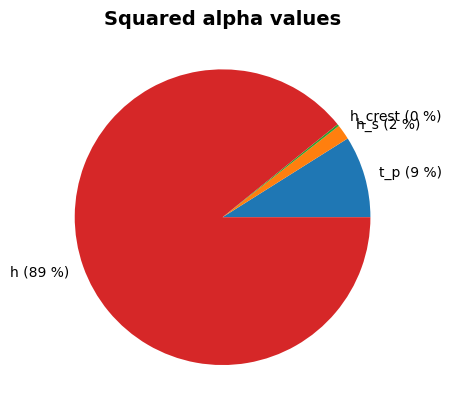

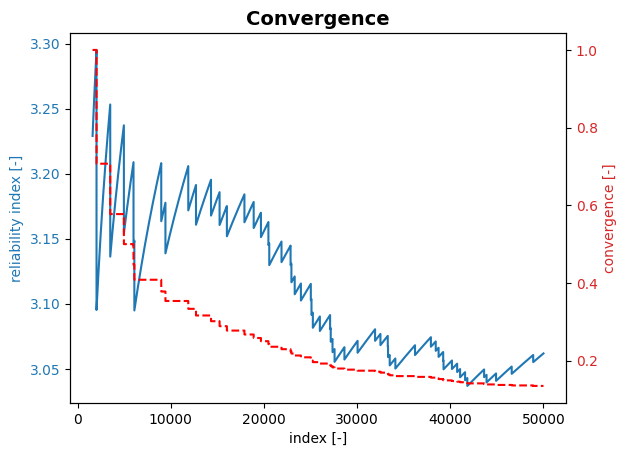

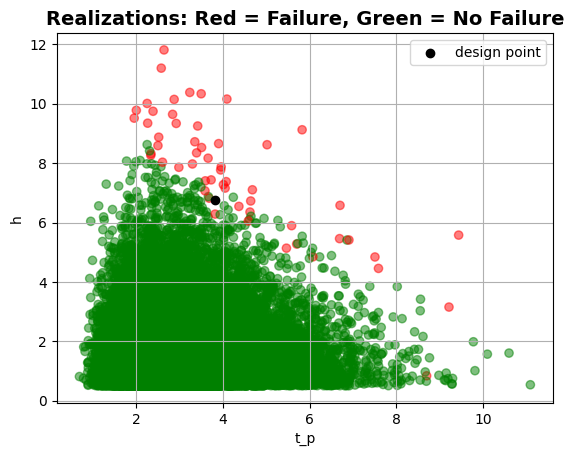

In [ ]:
project.settings.reliability_method = ReliabilityMethod.crude_monte_carlo
project.settings.minimum_samples = 10000
project.settings.maximum_samples = 50000
project.settings.variation_coefficient = 0.025
project.settings.save_realizations = True
project.settings.save_convergence = True

project.run()

project.design_point.print()
project.design_point.plot_alphas()
project.design_point.plot_realizations()
project.design_point.plot_convergence()


### Perform reliability calculations with Directional Sampling

We now conduct the reliability analysis using the `directional_sampling` method.

Reliability (Directional Sampling)
 Reliability index = 3.068
 Probability of failure = 0.001078
 Convergence = 0.02748 (not converged)
 Model runs = 111509
Alpha values:
 t_p: alpha = -0.3346, x = 3.972
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.1756, x = 3.39
 h_crest: alpha = 0.006802, x = 9.999
 h: alpha = -0.9258, x = 6.595



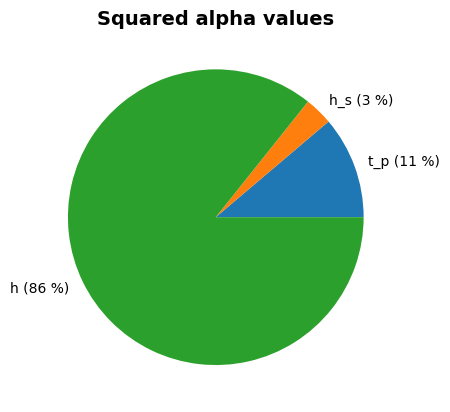

In [32]:
project.settings.reliability_method = ReliabilityMethod.directional_sampling
project.settings.minimum_directions = 10000
project.settings.maximum_directions = 20000
project.settings.variation_coefficient = 0.02

project.run()

project.design_point.print()
project.design_point.plot_alphas()

### Perform reliability calculations with Importance Sampling

We now conduct the reliability analysis using the `importance_sampling` assuming the start value of $u=1$ for the three random variables:

Reliability:
 Reliability index = 3.072
 Probability of failure = 0.001063
 Convergence = 0.02342 (not converged)
 Model runs = 100001
Alpha values:
 t_p: alpha = -0.3346, x = 3.973
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.1721, x = 3.379
 h_crest: alpha = 0.009329, x = 9.998
 h: alpha = -0.9265, x = 6.613



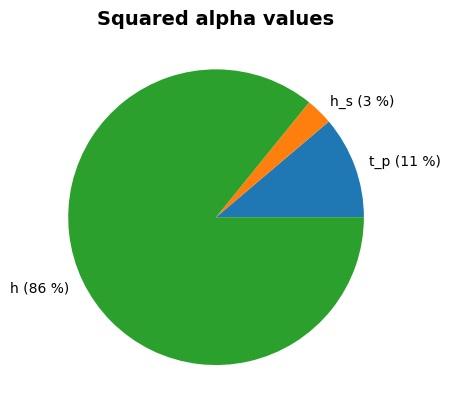

In [33]:
project.settings.reliability_method = ReliabilityMethod.importance_sampling
project.settings.minimum_samples = 1000
project.settings.maximum_samples = 100000
project.settings.variation_coefficient = 0.02

project.settings.stochast_settings["t_p"].start_value = 1
project.settings.stochast_settings["h_s"].start_value = 1
project.settings.stochast_settings["h"].start_value = 1

project.run()

project.design_point.print()
project.design_point.plot_alphas()

#reset values
project.settings.stochast_settings["t_p"].start_value = 0
project.settings.stochast_settings["h_s"].start_value = 0
project.settings.stochast_settings["h"].start_value = 0

### Perform reliability calculations with Adaptive Importance Sampling

We now conduct the reliability analysis using the `adaptive_importance_sampling` method.

Reliability:
 Reliability index = 3.069
 Probability of failure = 0.001072
 Convergence = 0.02 (converged)
 Model runs = 50976
Alpha values:
 t_p: alpha = -0.3317, x = 3.961
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.1642, x = 3.352
 h_crest: alpha = 0.01283, x = 9.998
 h: alpha = -0.9289, x = 6.63

Contributing design points:
  Reliability (Variance loop 1)
   Reliability index = 3.074
   Probability of failure = 0.001057
   Convergence = 0.1529 (not converged)
   Model runs = 10001
  Alpha values:
   t_p: alpha = -0.3606, x = 4.079
   tan_alpha: alpha = 0, x = 0.3333
   h_s: alpha = -0.2178, x = 3.537
   h_crest: alpha = -0.02189, x = 10
   h: alpha = -0.9066, x = 6.429

  Reliability (Variance loop 2)
   Reliability index = 3.07
   Probability of failure = 0.001069
   Convergence = 0.04657 (not converged)
   Model runs = 10001
  Alpha values:
   t_p: alpha = -0.3252, x = 3.935
   tan_alpha: alpha = 0, x = 0.3333
   h_s: alpha = -0.1697, x = 3.37
   h_crest: alpha = 0.01776, 

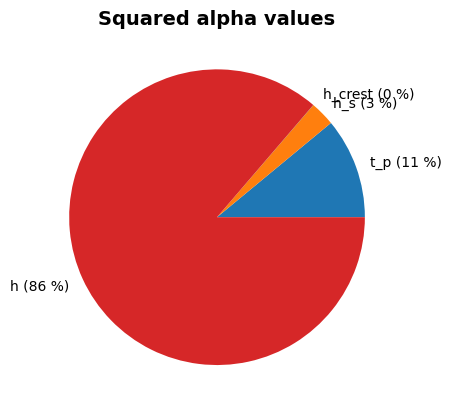

In [34]:
project.settings.reliability_method = ReliabilityMethod.adaptive_importance_sampling
project.settings.minimum_samples = 10000
project.settings.maximum_samples = 100000
project.settings.minimum_variance_loops = 5
project.settings.maximum_variance_loops = 10
project.settings.fraction_failed = 0.5
project.settings.variation_coefficient = 0.02

project.run()

project.design_point.print()
project.design_point.plot_alphas()

### Perform reliability calculations with Subset Simulation

We now conduct the reliability analysis using the `subset_simulation` method.

Reliability:
 Reliability index = 3.077
 Probability of failure = 0.001047
 Convergence = 0.01308 (not converged)
 Model runs = 45000
Alpha values:
 t_p: alpha = -0.3517, x = 4.044
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.1625, x = 3.348
 h_crest: alpha = 0.02568, x = 9.996
 h: alpha = -0.9215, x = 6.579

Contributing design points:
  Reliability (Subset iteration 1)
   Reliability index = 3.062
   Probability of failure = 0.0011
   Convergence = 0.1348 (not converged)
   Model runs = 50001
  Alpha values:
   t_p: alpha = -0.299, x = 3.831
   tan_alpha: alpha = 0, x = 0.3333
   h_s: alpha = -0.1287, x = 3.234
   h_crest: alpha = -0.04707, x = 10.01
   h: alpha = -0.9444, x = 6.757

  Reliability (Subset iteration 2)
   Reliability index = 3.075
   Probability of failure = 0.001054
   Convergence = 0.04333 (not converged)
   Model runs = 45000
  Alpha values:
   t_p: alpha = -0.3562, x = 4.061
   tan_alpha: alpha = 0, x = 0.3333
   h_s: alpha = -0.1712, x = 3.376
   h_crest: a

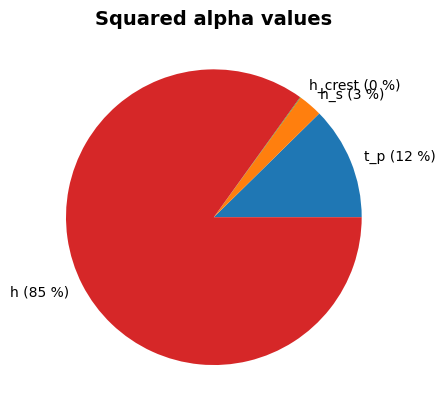

In [35]:
project.settings.reliability_method = ReliabilityMethod.subset_simulation
project.settings.minimum_samples = 1000
project.settings.maximum_samples = 50000
project.settings.variation_coefficient = 0.02
project.settings.sample_method = SampleMethod.adaptive_conditional

project.run()

project.design_point.print()
project.design_point.plot_alphas()

### Perform reliability calculations with Latin hypercube

We now conduct the reliability analysis using the `latin_hypercube`.

Reliability:
 Reliability index = 3.076
 Probability of failure = 0.00105
 Convergence = 0.09754 (not converged)
 Model runs = 100001
Alpha values:
 t_p: alpha = -0.2787, x = 3.759
 tan_alpha: alpha = 0, x = 0.3333
 h_s: alpha = -0.1373, x = 3.264
 h_crest: alpha = 0.05574, x = 9.991
 h: alpha = -0.9489, x = 6.843



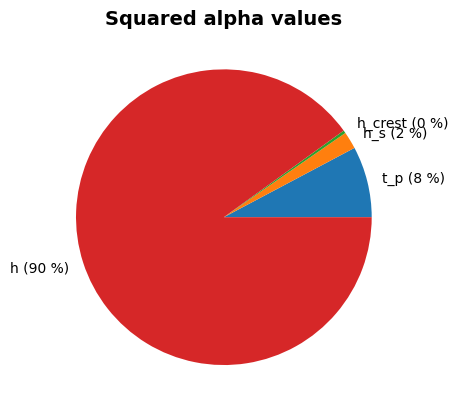

In [36]:
project.settings.reliability_method = ReliabilityMethod.latin_hypercube
project.settings.minimum_samples = 100000

project.run()

project.design_point.print()
project.design_point.plot_alphas()